In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data

# read the excel file without headers
df = pd.read_excel('dataset/Bubble point pressure (Pb).xlsx', header=2)
df.head()

,Pb,T,Rsb,Gas gravity,Density,API,X,log(Pb),Pb.1,Error%,...,C,D,Y,Pb.7,Error%.6,X.2,Pb.8,Error%.7,Pb.9,Error%.8
0,333.00,142.0,32.3,1.001,0.9310,20.487111,2.015089,2.269822,186.132315,44.104410,...,-0.115349,-3.082459,-2.986690,224.167206,32.682521,0.047224,216.554234,34.968698,278.382010,16.401799
1,120.00,133.1,17.9,1.159,0.8788,29.515020,0.761241,1.555950,35.970769,70.024359,...,-0.146131,-3.745097,-4.115515,106.449277,11.292270,0.039155,78.387671,34.676941,120.444162,0.370135
2,185.00,141.0,15.4,1.232,0.9371,19.497759,0.974876,1.747583,55.922052,69.771864,...,-0.118745,-3.903539,-3.983306,116.036307,37.277672,0.047717,76.184723,58.819069,125.985466,31.899748
3,132.00,137.0,10.5,1.103,0.9410,18.871945,0.802199,1.597132,39.548722,70.038847,...,-0.132487,-4.283057,-4.248868,97.607442,26.054969,0.047648,64.819885,50.894027,107.956379,18.214864
4,242.73,145.0,26.2,1.081,0.9399,19.047931,1.720751,2.161367,144.999675,40.262977,...,-0.105254,-3.324025,-3.248972,188.227547,22.453942,0.048397,161.913359,33.294871,227.427816,6.304200


In [3]:
bp_subset = df.iloc[:59,:6]
bp_subset.head()

,Pb,T,Rsb,Gas gravity,Density,API
0,333.00,142.0,32.3,1.001,0.9310,20.487111
1,120.00,133.1,17.9,1.159,0.8788,29.515020
2,185.00,141.0,15.4,1.232,0.9371,19.497759
3,132.00,137.0,10.5,1.103,0.9410,18.871945
4,242.73,145.0,26.2,1.081,0.9399,19.047931


In [4]:
galso_Bp = df.iloc[:59,8:9]
galso_Bp.head()

,Pb.1
0,186.132315
1,35.970769
2,55.922052
3,39.548722
4,144.999675


In [5]:
stand_Bp = df.iloc[:59,11:12]
stand_Bp.head()

,Pb.2
0,217.449532
1,74.274707
2,88.045837
3,65.950590
4,175.446399


In [6]:
vas_beg_Bp = df.iloc[:59,14:15]
vas_beg_Bp.head()

,Pb.3
0,223.716312
1,78.779668
2,97.580019
3,77.568742
4,182.841934


In [7]:
al_Bp = df.iloc[:59,16:17]
al_Bp.head()

,Pb.4
0,250.586786
1,102.038243
2,101.753779
3,95.639074
4,193.689376


In [8]:
fa_le_Bp = df.iloc[:59,18:19]
fa_le_Bp.head()

,Pb.5
0,305.808505
1,123.557438
2,143.985584
3,117.239191
4,252.956096


In [9]:
ka_sch_Bp = df.iloc[:59,22:23]
ka_sch_Bp.head()

,Pb.6
0,192.028247
1,58.920060
2,81.508523
3,62.265488
4,158.284297


In [10]:
va_mc_Bp = df.iloc[:59,29:30]
va_mc_Bp.head()

,Pb.7
0,224.167206
1,106.449277
2,116.036307
3,97.607442
4,188.227547


In [11]:
vbm_Bp = df.iloc[:59,32:33]
vbm_Bp.head()

,Pb.8
0,216.554234
1,78.387671
2,76.184723
3,64.819885
4,161.913359


In [12]:
alsha_Bp = df.iloc[:59,34:35]
alsha_Bp.head()

,Pb.9
0,278.382010
1,120.444162
2,125.985466
3,107.956379
4,227.427816


In [13]:
bp_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pb           59 non-null     float64
 1   T            59 non-null     float64
 2   Rsb          59 non-null     float64
 3   Gas gravity  59 non-null     float64
 4   Density      59 non-null     float64
 5   API          59 non-null     float64
dtypes: float64(6)
memory usage: 2.9 KB


In [14]:
summary = bp_subset.describe(include='all')

In [15]:
summary.loc['kurtosis'] = bp_subset.kurtosis()
summary.loc['skewness'] = bp_subset.skew()
#summary.loc['Co-variance'] = df_rs1.cov().stack()
summary.loc['Coefficent of variance'] = bp_subset.std() / bp_subset.mean() * 100
summary

,Pb,T,Rsb,Gas gravity,Density,API
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,651.385254,170.754746,106.499678,1.000906,0.877475,30.080163
std,837.171826,28.633997,170.013272,0.270360,0.039399,7.300361
min,51.000000,125.600000,1.200000,0.591500,0.806600,18.871945
25%,199.000000,143.000000,25.120000,0.776500,0.837600,24.328673
50%,328.000000,171.900000,51.300000,0.969000,0.884300,28.513570
75%,717.000000,193.950000,88.613500,1.210000,0.908050,37.435055
max,3827.000000,244.000000,770.170000,1.530000,0.941000,43.927721
kurtosis,6.652907,-0.365983,7.247372,-1.068399,-1.233452,-1.216017
skewness,2.590632,0.287824,2.796835,0.289839,-0.091240,0.194930


In [16]:
total_dataset = pd.concat([bp_subset, galso_Bp, stand_Bp, vas_beg_Bp, al_Bp, fa_le_Bp, ka_sch_Bp, va_mc_Bp, vbm_Bp, alsha_Bp], axis=1)
total_dataset.shape

(59, 15)

In [17]:
total_dataset.head()

,Pb,T,Rsb,Gas gravity,Density,API,Pb.1,Pb.2,Pb.3,Pb.4,Pb.5,Pb.6,Pb.7,Pb.8,Pb.9
0,333.00,142.0,32.3,1.001,0.9310,20.487111,186.132315,217.449532,223.716312,250.586786,305.808505,192.028247,224.167206,216.554234,278.382010
1,120.00,133.1,17.9,1.159,0.8788,29.515020,35.970769,74.274707,78.779668,102.038243,123.557438,58.920060,106.449277,78.387671,120.444162
2,185.00,141.0,15.4,1.232,0.9371,19.497759,55.922052,88.045837,97.580019,101.753779,143.985584,81.508523,116.036307,76.184723,125.985466
3,132.00,137.0,10.5,1.103,0.9410,18.871945,39.548722,65.950590,77.568742,95.639074,117.239191,62.265488,97.607442,64.819885,107.956379
4,242.73,145.0,26.2,1.081,0.9399,19.047931,144.999675,175.446399,182.841934,193.689376,252.956096,158.284297,188.227547,161.913359,227.427816


In [18]:
total_dataset.corr()

,Pb,T,Rsb,Gas gravity,Density,API,Pb.1,Pb.2,Pb.3,Pb.4,Pb.5,Pb.6,Pb.7,Pb.8,Pb.9
Pb,1.000000,0.283580,0.974373,-0.385052,-0.265299,0.258291,0.969890,0.971393,0.968334,0.916949,0.957363,0.971064,0.964932,0.940769,0.980973
T,0.283580,1.000000,0.353513,0.253218,-0.670154,0.670955,0.231986,0.255461,0.252711,0.182122,0.210229,0.265428,0.250185,0.204126,0.263350
Rsb,0.974373,0.353513,1.000000,-0.269421,-0.325781,0.322319,0.939145,0.943054,0.944765,0.857365,0.918066,0.957050,0.934553,0.888117,0.956726
Gas gravity,-0.385052,0.253218,-0.269421,1.000000,-0.051452,0.069813,-0.427414,-0.427027,-0.413532,-0.540359,-0.447602,-0.379576,-0.436199,-0.520858,-0.430250
Density,-0.265299,-0.670154,-0.325781,-0.051452,1.000000,-0.999248,-0.201863,-0.219614,-0.234154,-0.192573,-0.187141,-0.238113,-0.226473,-0.204587,-0.235489
API,0.258291,0.670955,0.322319,0.069813,-0.999248,1.000000,0.192788,0.210337,0.225654,0.180472,0.176874,0.230727,0.217186,0.192759,0.226264
Pb.1,0.969890,0.231986,0.939145,-0.427414,-0.201863,0.192788,1.000000,0.998954,0.998173,0.974532,0.996848,0.995367,0.998148,0.986674,0.994735
Pb.2,0.971393,0.255461,0.943054,-0.427027,-0.219614,0.210337,0.998954,1.000000,0.998609,0.974411,0.996279,0.995713,0.998683,0.987049,0.996773
Pb.3,0.968334,0.252711,0.944765,-0.413532,-0.234154,0.225654,0.998173,0.998609,1.000000,0.971865,0.995243,0.998407,0.997779,0.983799,0.994203
Pb.4,0.916949,0.182122,0.857365,-0.540359,-0.192573,0.180472,0.974532,0.974411,0.971865,1.000000,0.980019,0.958095,0.981712,0.997063,0.959967


In [19]:
bp_subset.corr()

,Pb,T,Rsb,Gas gravity,Density,API
Pb,1.000000,0.283580,0.974373,-0.385052,-0.265299,0.258291
T,0.283580,1.000000,0.353513,0.253218,-0.670154,0.670955
Rsb,0.974373,0.353513,1.000000,-0.269421,-0.325781,0.322319
Gas gravity,-0.385052,0.253218,-0.269421,1.000000,-0.051452,0.069813
Density,-0.265299,-0.670154,-0.325781,-0.051452,1.000000,-0.999248
API,0.258291,0.670955,0.322319,0.069813,-0.999248,1.000000


In [20]:
bp_subset.isna().any()

Pb             False
T              False
Rsb            False
Gas gravity    False
Density        False
API            False
dtype: bool

In [21]:
bp_subset.isnull().any()

Pb             False
T              False
Rsb            False
Gas gravity    False
Density        False
API            False
dtype: bool

In [22]:
bp_subset[bp_subset.duplicated()]

,Pb,T,Rsb,Gas gravity,Density,API


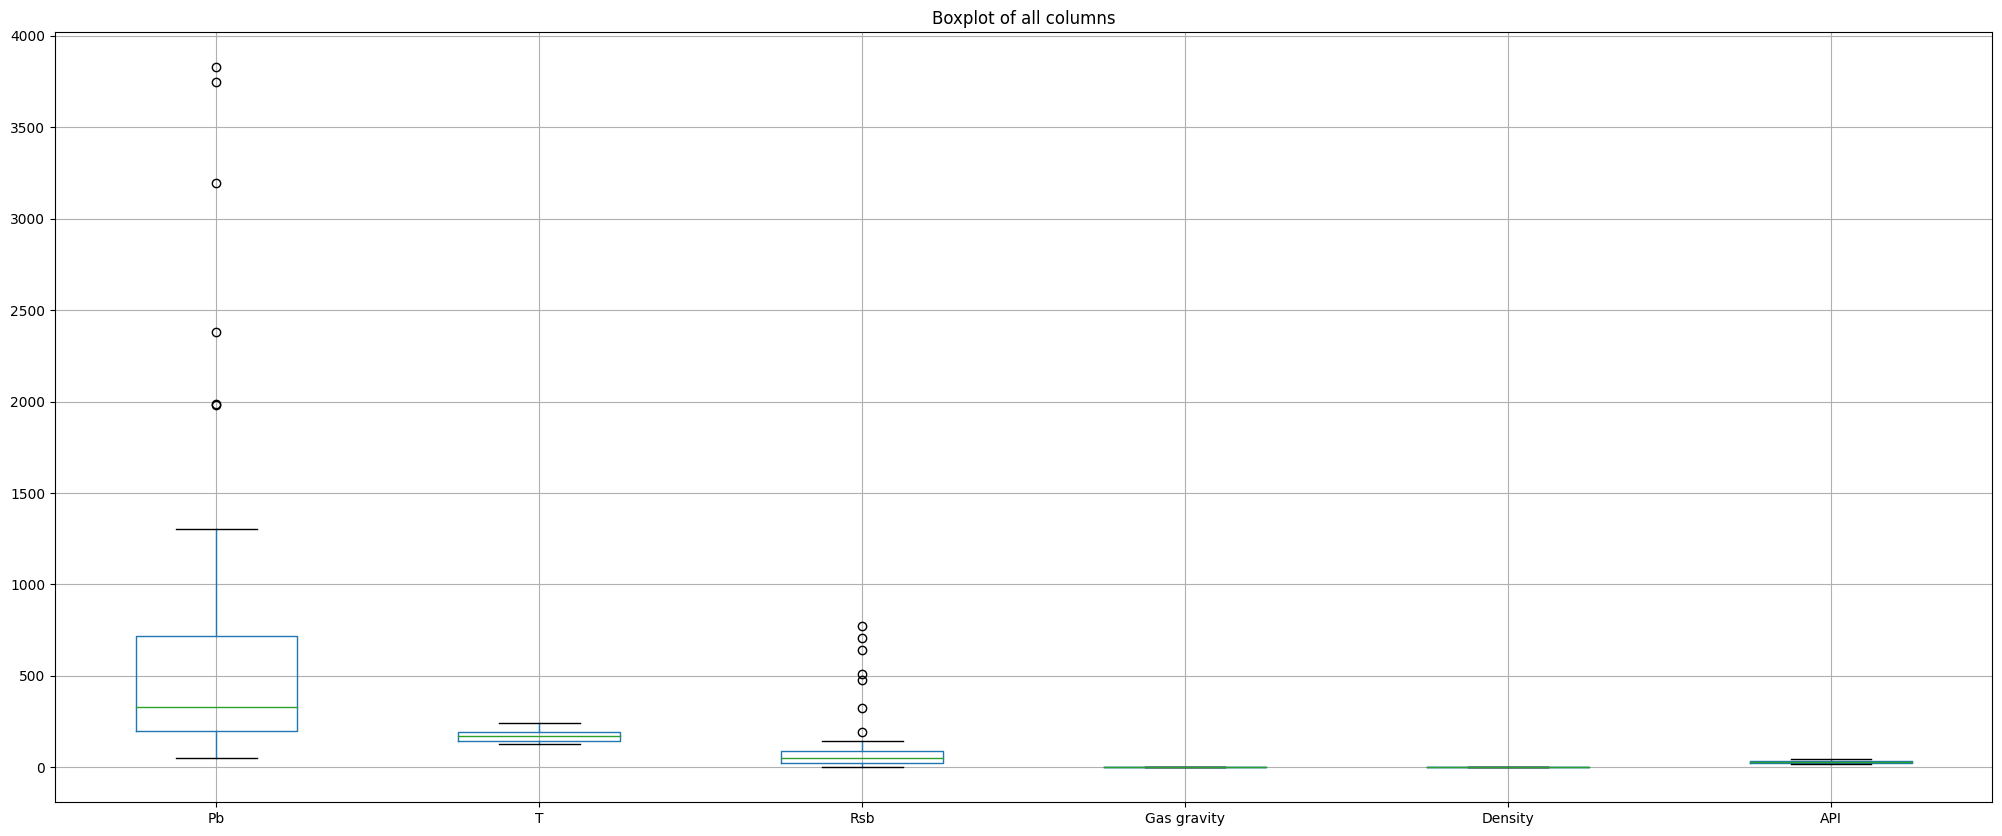

In [23]:
# Plot the boxplot for all columns in the DataFrame
plt.figure(figsize=(25, 10)) # Set the size of the plot
bp_subset.boxplot() # Plot the boxplot
plt.title('Boxplot of all columns') # Add a title to the plot
plt.show() # Show the plot

In [24]:
# calculate lower and upper bounds using IQR
Q1 = bp_subset["Rsb"].quantile(0.25)
Q3 = bp_subset["Rsb"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# replace outliers with mean
mean = np.mean(bp_subset["Rsb"])
bp_subset["Rsb"] = np.where(
    (bp_subset["Rsb"] < lower_bound) | 
    (bp_subset["Rsb"] > upper_bound), 
    mean, 
    bp_subset["Rsb"]
)

# calculate lower and upper bounds using IQR
Q1 = bp_subset["Pb"].quantile(0.25)
Q3 = bp_subset["Pb"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# replace outliers with mean
mean = np.mean(bp_subset["Pb"])
bp_subset["Pb"] = np.where(
    (bp_subset["Pb"] < lower_bound) | 
    (bp_subset["Pb"] > upper_bound), 
    mean, 
    bp_subset["Pb"]
)

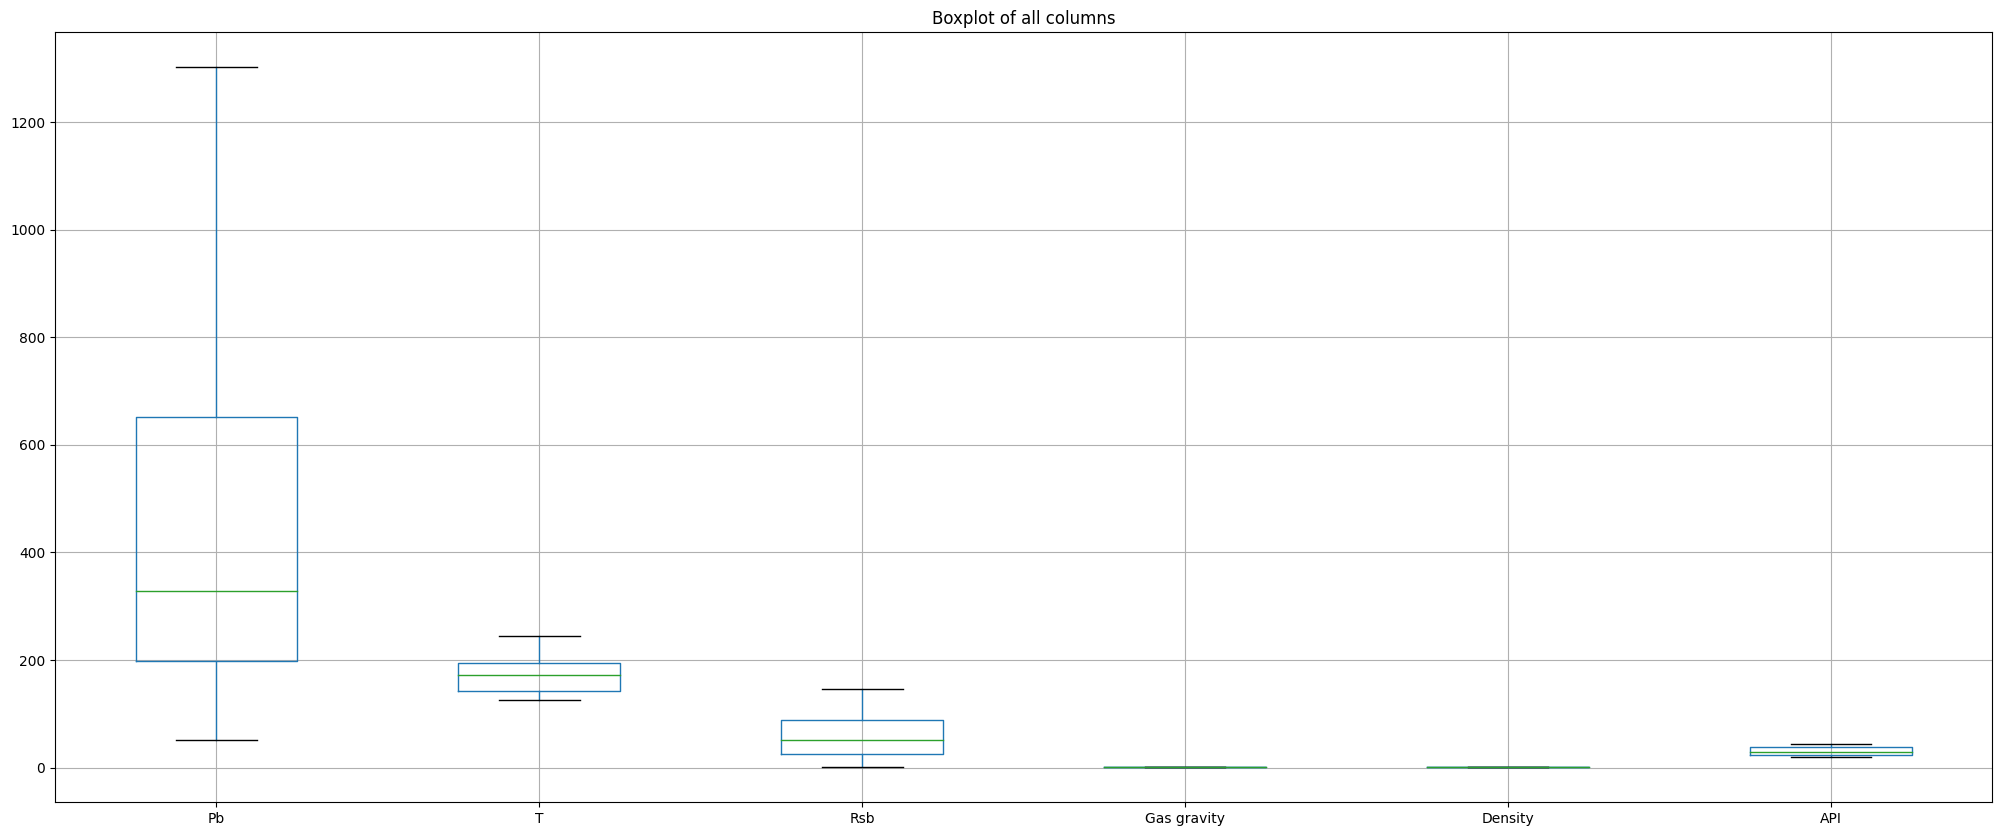

In [25]:
# Plot the boxplot for all columns in the DataFrame
plt.figure(figsize=(25, 10)) # Set the size of the plot
bp_subset.boxplot() # Plot the boxplot
plt.title('Boxplot of all columns') # Add a title to the plot
plt.show() # Show the plot

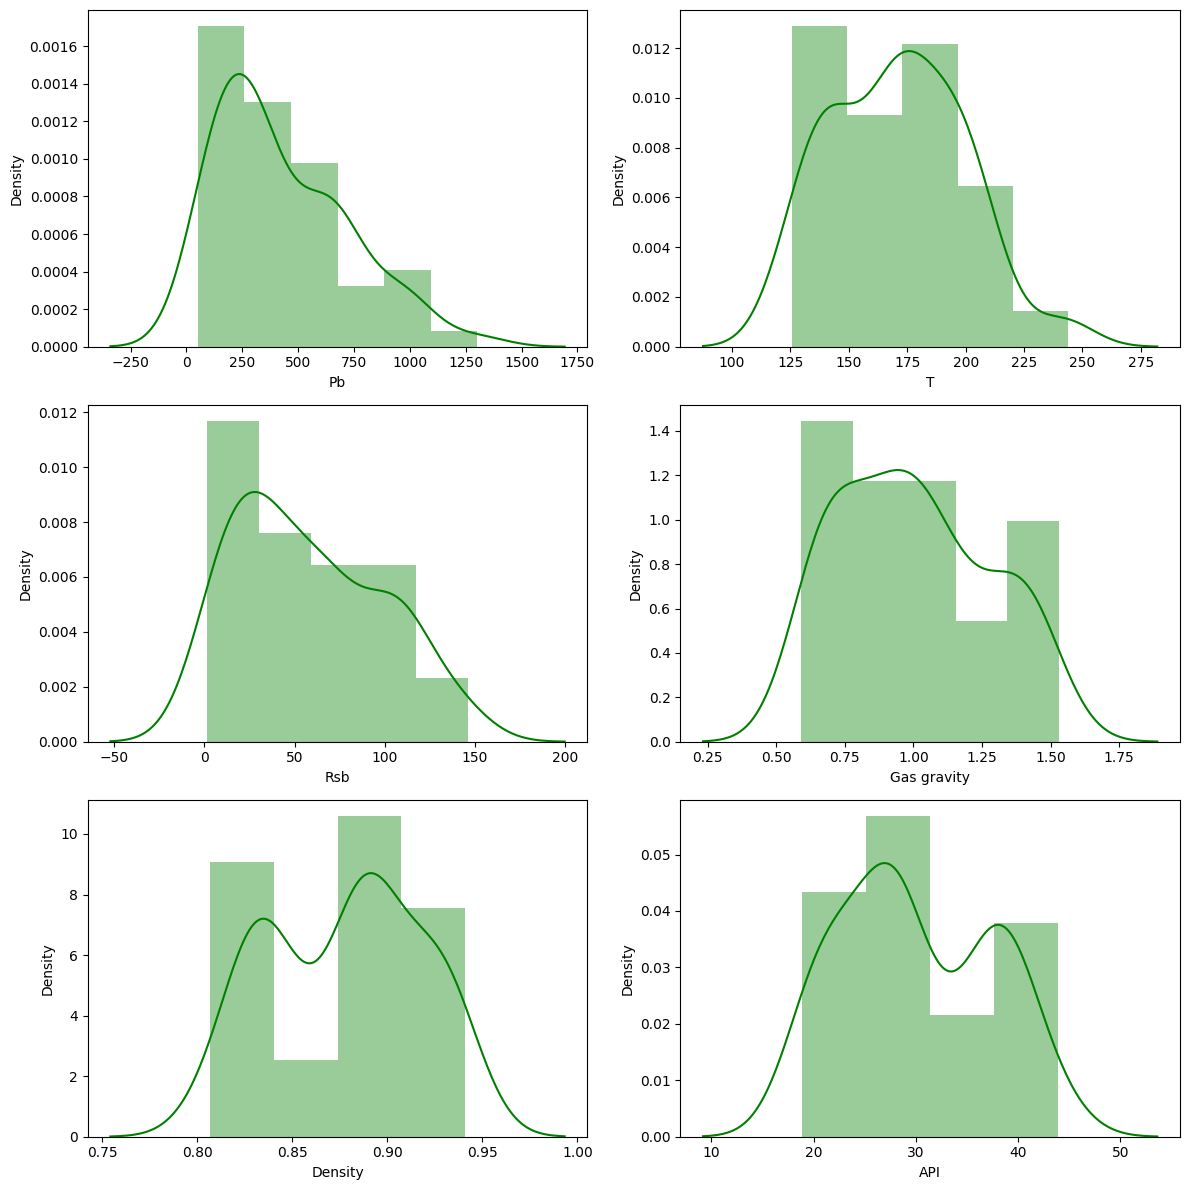

In [26]:
#Plotting distributions of each columns
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
columns=bp_subset.columns
i=0
j=0
for col in columns[:]:
    sns.distplot(bp_subset[col] , color="green", ax=axes[i, j])
    if j==0:
        j=1
    else:
        j=0
        i=i+1   

plt.tight_layout()

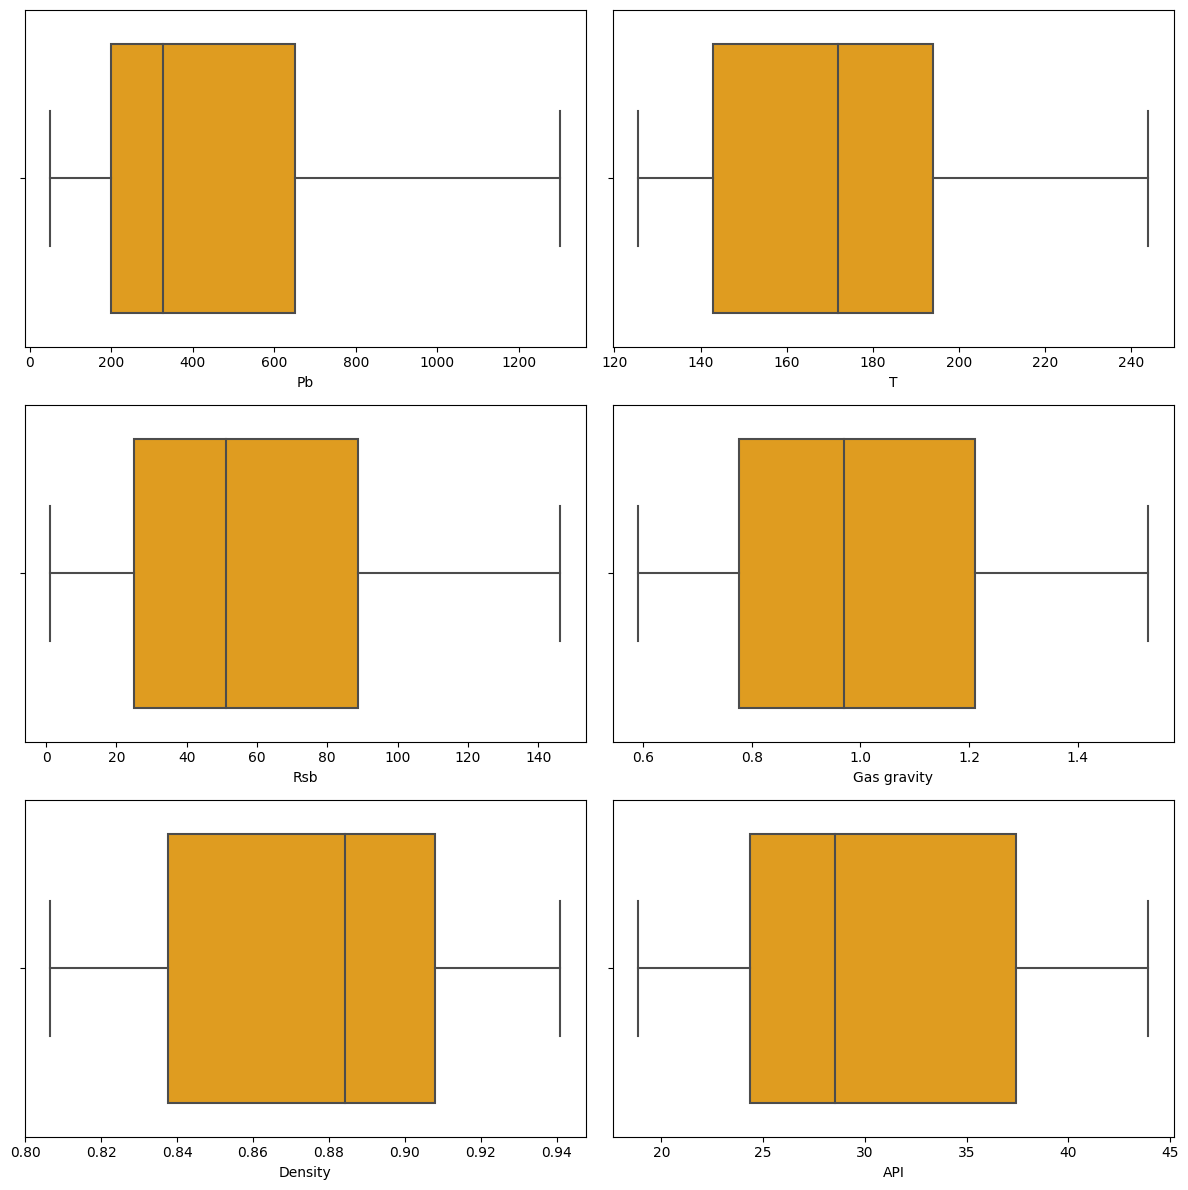

In [27]:
#Plotting distributions of each columns 
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
columns=bp_subset.columns
i=0
j=0
for col in columns[:]:
    sns.boxplot(bp_subset[col] , color="orange", ax=axes[i, j])
    if j==0:
        j=1
    else:
        j=0
        i=i+1   

plt.tight_layout()

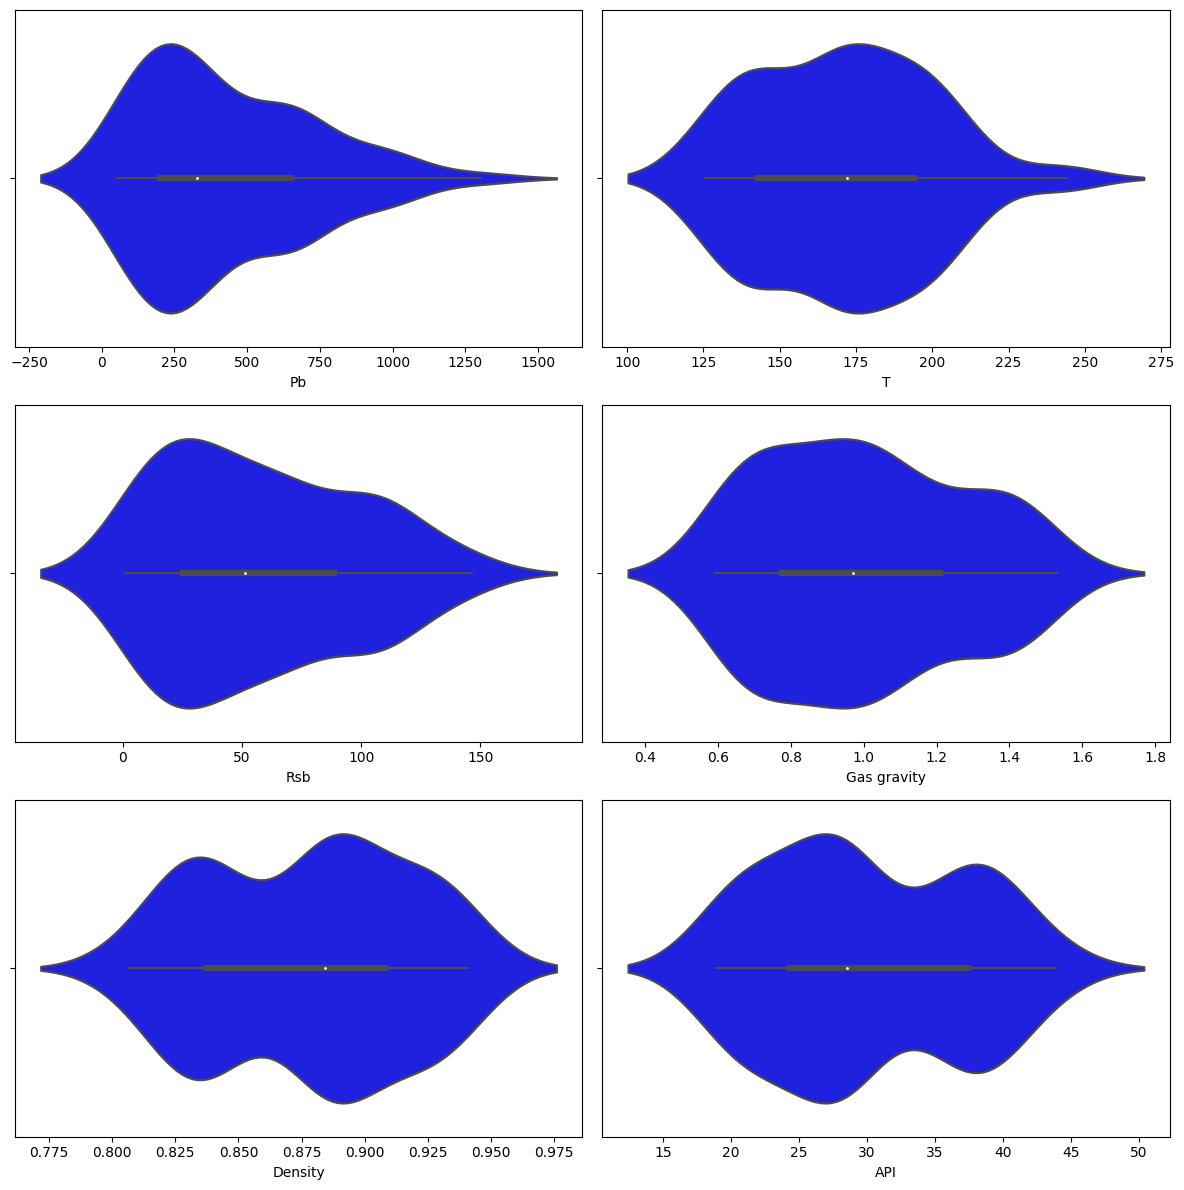

In [28]:
#Plotting distributions of each columns
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
columns=bp_subset.columns
i=0
j=0
for col in columns[:]:
    sns.violinplot(bp_subset[col] , color="blue", ax=axes[i, j])
    if j==0:
        j=1
    else:
        j=0
        i=i+1   

plt.tight_layout()

<AxesSubplot:>

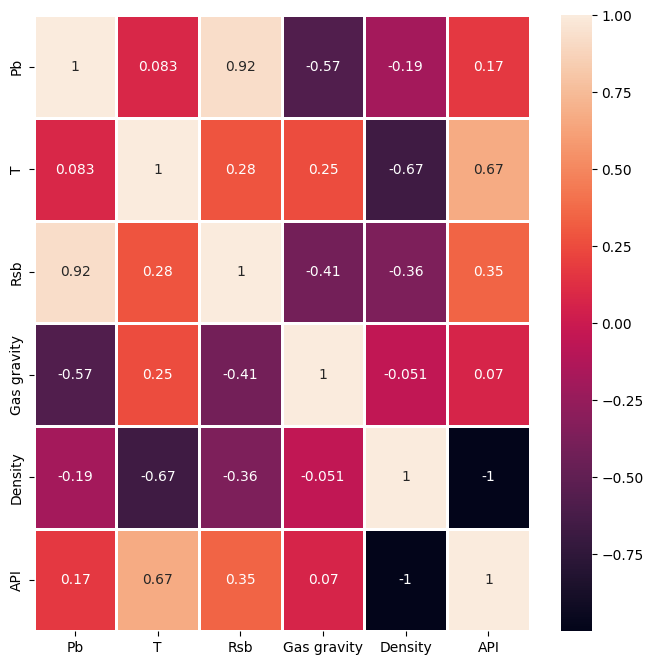

In [29]:
#let’s plot the Pearson correlation coefficient heat map as follows. 
plt.figure(figsize=(8,8))
sns.heatmap(bp_subset.corr(), annot=True,linewidths=2)

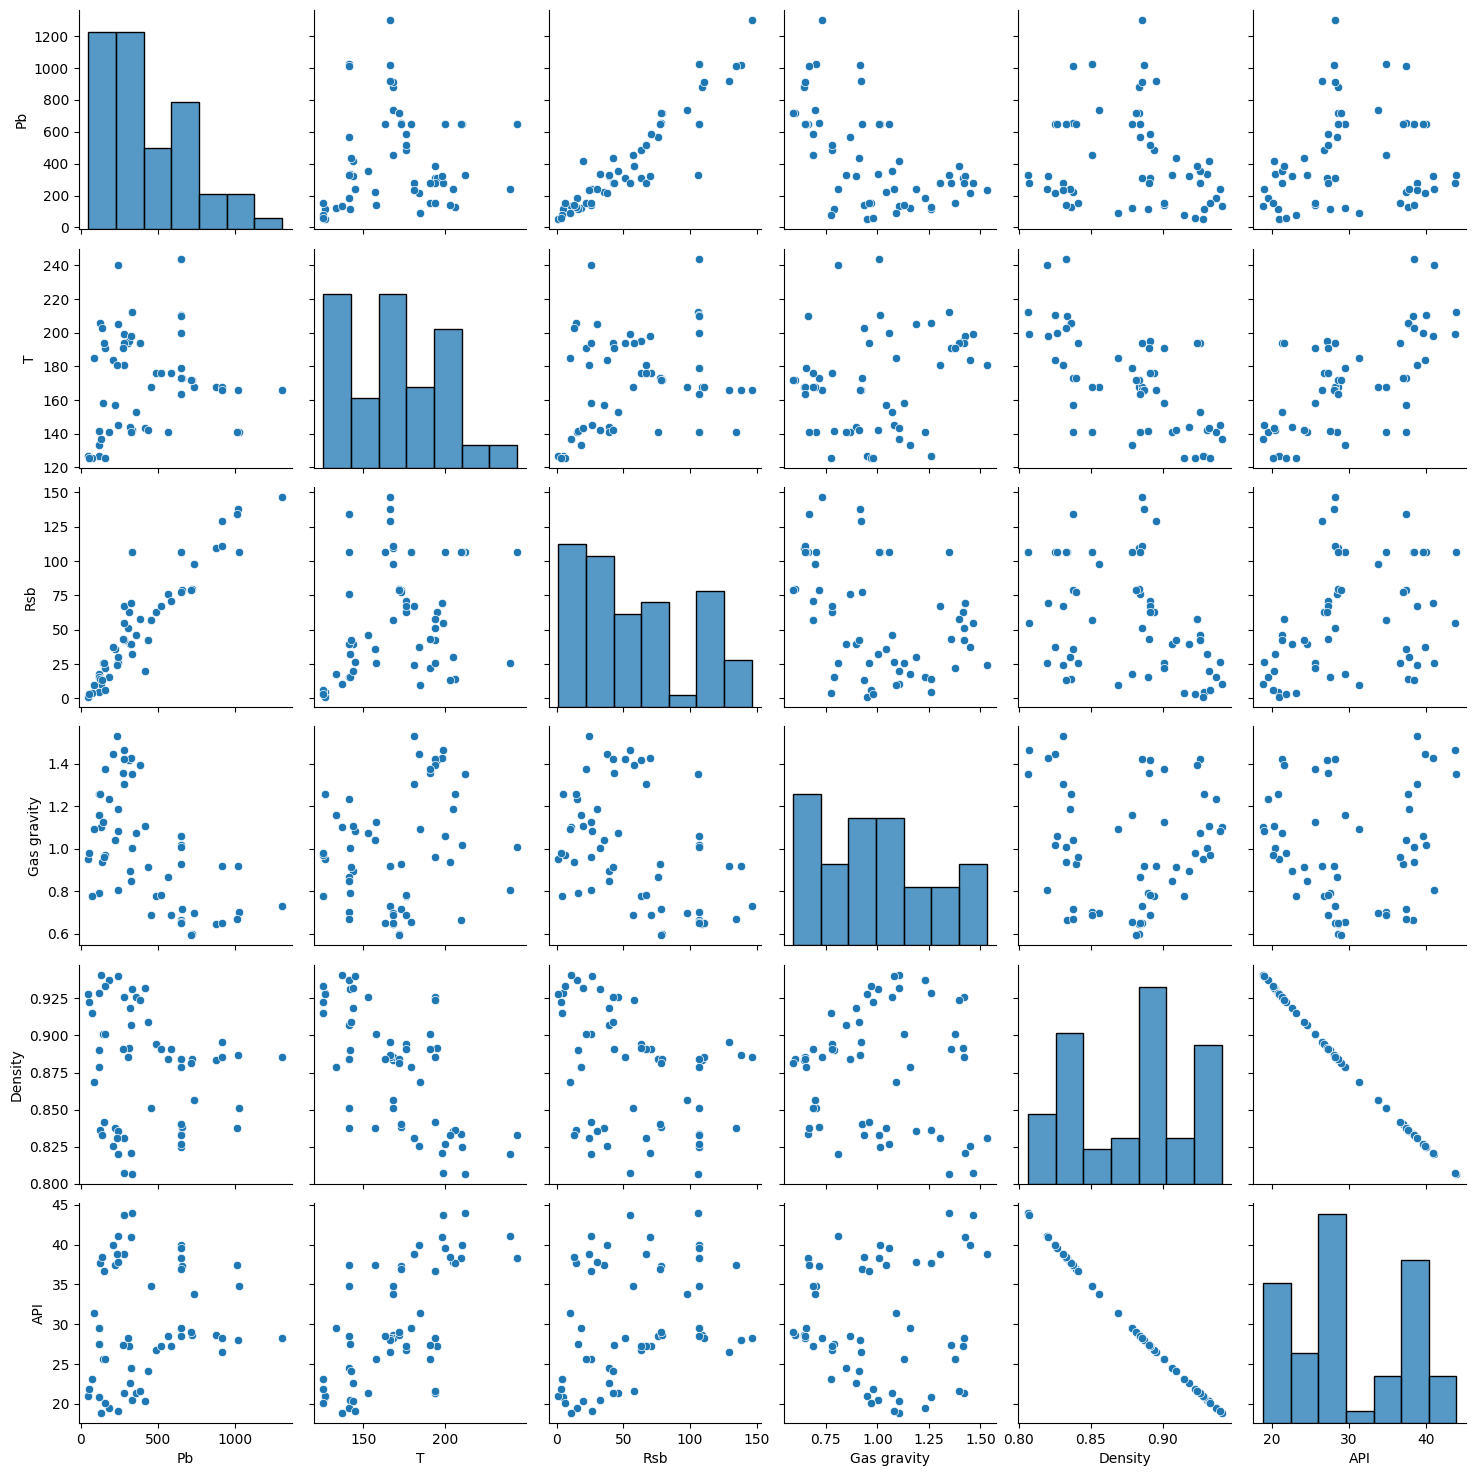

In [30]:
# Create the default pairplot
sns.pairplot(bp_subset)

In [31]:
bp_subset.corrwith(bp_subset['Pb'])

Pb             1.000000
T              0.082654
Rsb            0.923784
Gas gravity   -0.570909
Density       -0.185326
API            0.168900
dtype: float64

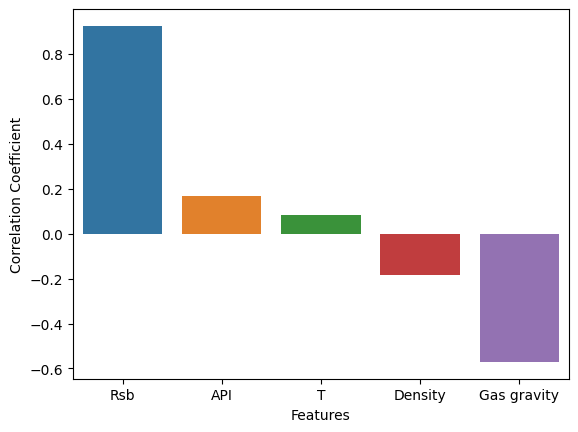

In [32]:
# Calculate the correlation coefficients between the target variable and all other predictor variables
corr = bp_subset.corr()['Pb']
corr = corr[['Rsb','API','T','Density','Gas gravity']]

# Plot a bar chart or a heatmap of the correlation coefficients
sns.barplot(x=corr.index, y=corr.values)

# Sort the predictor variables by their correlation coefficients
corr_sorted = corr.sort_values(ascending=False)

# Highlight the target variable in the plot
sns.barplot(x=corr_sorted.index, y=corr_sorted.values)
# Add a y-axis label
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

### Dataset does not have any NULL values and there are no outliers on the data too. So, we can proceed with the existing data as it is.

In [33]:
X = bp_subset.iloc[:,1:6]
X.head()

,T,Rsb,Gas gravity,Density,API
0,142.0,32.3,1.001,0.9310,20.487111
1,133.1,17.9,1.159,0.8788,29.515020
2,141.0,15.4,1.232,0.9371,19.497759
3,137.0,10.5,1.103,0.9410,18.871945
4,145.0,26.2,1.081,0.9399,19.047931


In [34]:
y = bp_subset.iloc[:,0:1]
y.head()

,Pb
0,333.00
1,120.00
2,185.00
3,132.00
4,242.73


In [35]:
y_Bp = pd.concat([y, galso_Bp, stand_Bp, vas_beg_Bp, al_Bp, fa_le_Bp, ka_sch_Bp, va_mc_Bp, vbm_Bp, alsha_Bp], axis=1)
y_Bp.shape

(59, 10)

In [36]:
y_Bp_train, y_Bp_test = train_test_split(y_Bp, test_size=0.3, random_state=42)

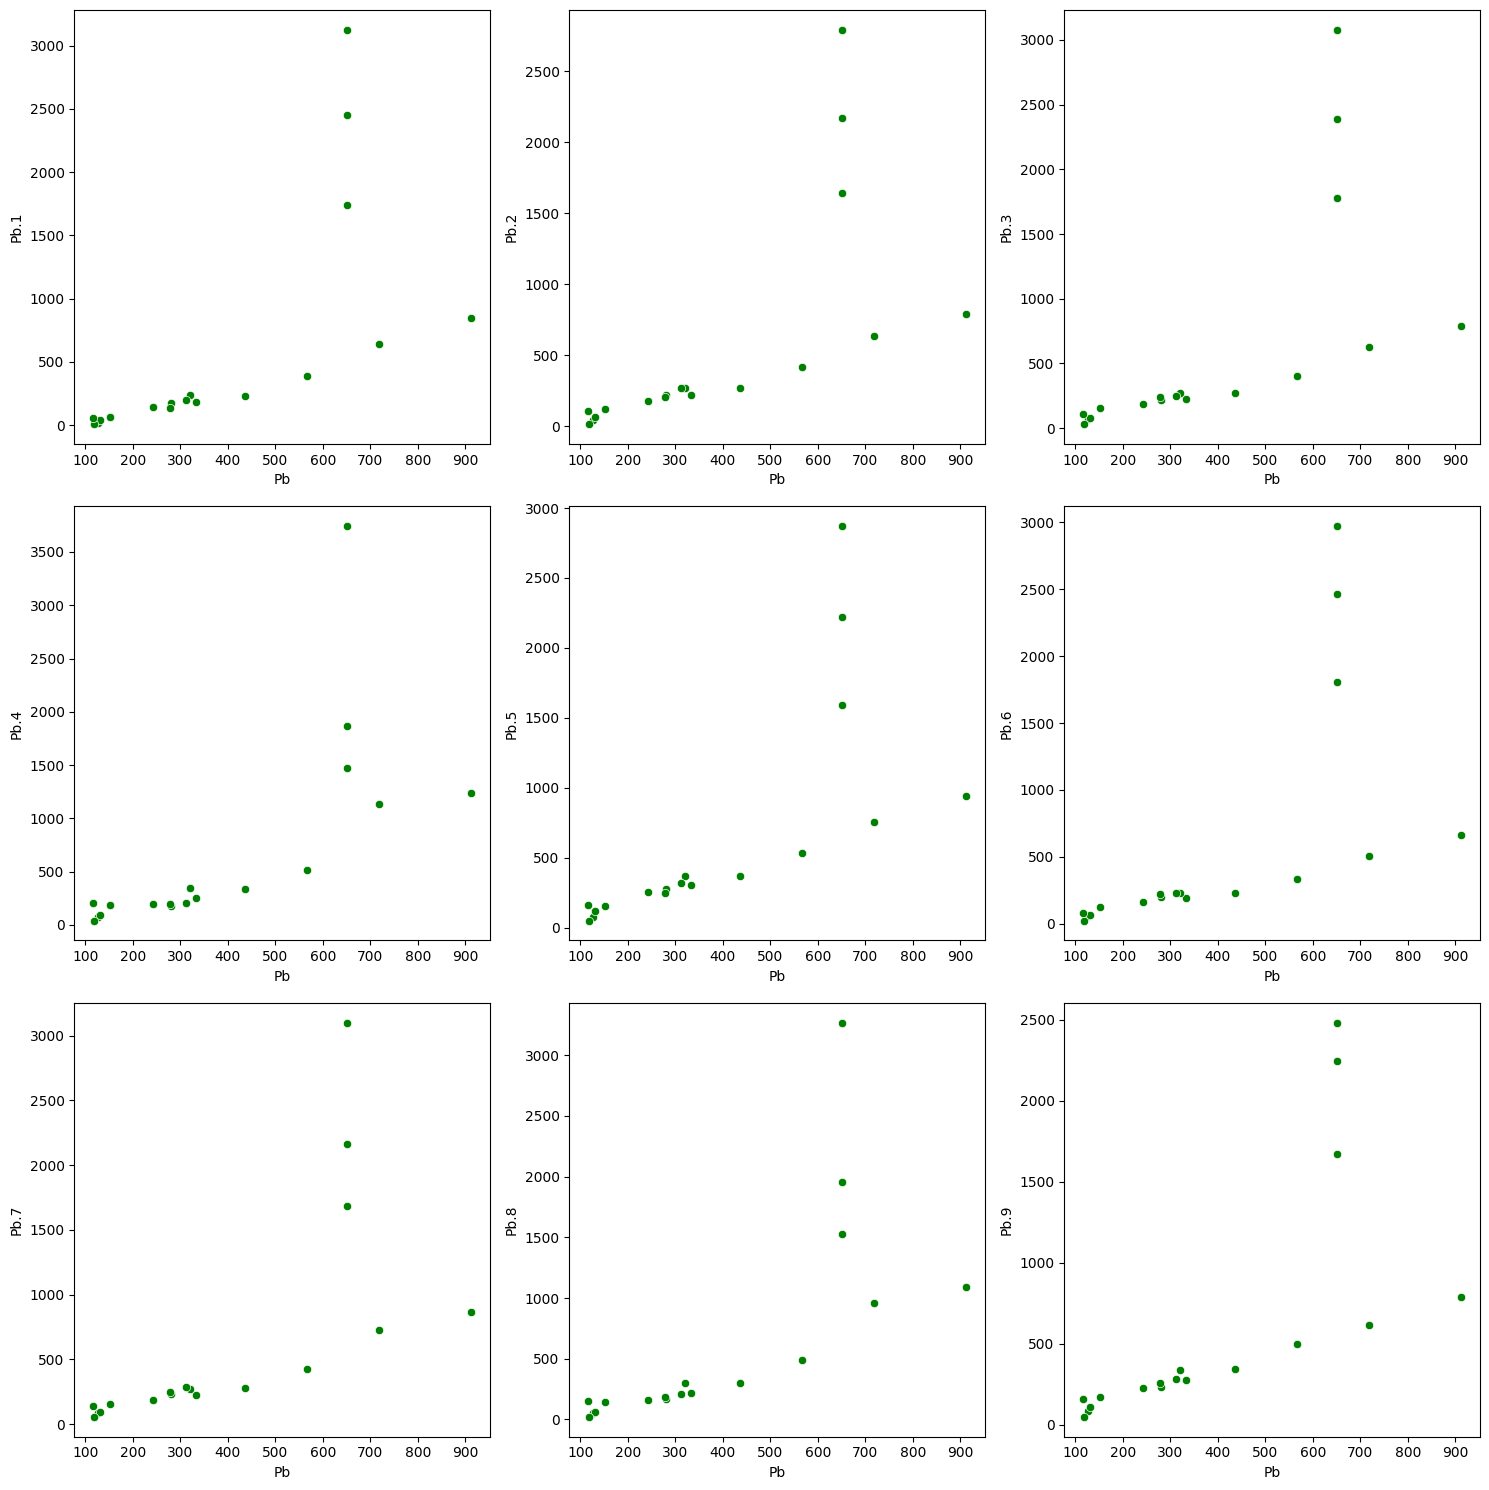

In [37]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
k=0
l=0
for i in (y_Bp_test.iloc[:,1:]):
    sns.scatterplot(y_Bp_test.iloc[:,0], y_Bp_test[i], color='g',ax=axes[k, l])
    if (l==0 or l == 1):
        if(l==0):
            l=1
        else:
            l=2
    else:
        l=0
        k=k+1  
plt.tight_layout()

In [38]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from scipy.stats import pearsonr

#### Splitting the data into Train and Test (70:30)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
#Scaling the data 

# create a StandardScaler object
scaler = MinMaxScaler()

# fit the scaler to the dataset
scaler.fit(X_train)

# transform the dataset using the fitted scaler
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

scaler_Y = MinMaxScaler()

# fit the scaler to the dataset
scaler_Y.fit(y_train)
# transform the dataset using the fitted scaler
y_scaled_train = scaler_Y.transform(y_train)
y_scaled_test = scaler_Y.transform(y_test)

In [41]:
# Define the parameter grid for each model
# linreg_params = {'normalize': [True, False]}
lasso_params = {'alpha': [0.01, 0.1, 1]}
knn_params = {'n_neighbors': np.arange(1, 11)}
rf_params = {'n_estimators': range(10, 250, 50), 'max_depth': range(2, 20, 2), 'min_samples_leaf': range(1, 10, 2)}
ann_params = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['logistic', 'relu'], 'alpha': [0.0001, 0.001, 0.01]}
svm_params = {'C': [0.1, 1, 10, 100], 'epsilon': [1.001, 0.01, 0.1, 1]}
gboost_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.02], 'max_depth': [3, 4, 5]}

In [42]:
# Define the models to build in the for loop
models = [(Lasso(), lasso_params),
          (KNeighborsRegressor(), knn_params),
          (RandomForestRegressor(), rf_params),
          (MLPRegressor(), ann_params),
          (SVR(), svm_params),
          (GradientBoostingRegressor(), gboost_params)
         ]

In [43]:
# Loop over the models and perform grid search cross-validation
for model, params in models:
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
    grid_search.fit(X_scaled_train, y_scaled_train)
    y_pred = grid_search.predict(X_scaled_test)
    mse = mean_squared_error(y_scaled_test, y_pred)
    y_scaled_test = np.squeeze(y_scaled_test)
    mse = mean_squared_error(y_scaled_test, y_pred)
    r2 = r2_score(y_scaled_test, y_pred)
    r, p_value = pearsonr(y_scaled_test,y_pred)
    n = len(y_scaled_test)
    aape = (100/n) * sum(abs(y_scaled_test[i] - y_pred[i]) / y_scaled_test[i] for i in range(n))
    print(str(model))
    print("Best parameters: ", grid_search.best_params_)
    print("Mean squared error: {:.3f}".format(mse))
    print("R-squared: {:.3f}".format(r2))
    print("R value: ",r)
    print("AAPE:",aape)
    print("------------------------------------------------------------------------------")

Lasso()
Best parameters:  {'alpha': 0.01}
Mean squared error: 0.004
R-squared: 0.884
R value:  0.9468533025127908
AAPE: 33.80420720669094
------------------------------------------------------------------------------
KNeighborsRegressor()
Best parameters:  {'n_neighbors': 2}
Mean squared error: 0.007
R-squared: 0.809
R value:  [0.9364371259128199]
AAPE: [54.71415838]
------------------------------------------------------------------------------
RandomForestRegressor()
Best parameters:  {'max_depth': 6, 'min_samples_leaf': 1, 'n_estimators': 60}
Mean squared error: 0.005
R-squared: 0.849
R value:  0.9305763126183567
AAPE: 39.26859712832413
------------------------------------------------------------------------------
MLPRegressor()
Best parameters:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50)}
Mean squared error: 0.003
R-squared: 0.924
R value:  0.9616844149783436
AAPE: 28.412128779218396
-------------------------------------------------------------------------

In [44]:
from sklearn.model_selection import RandomizedSearchCV

for model, params in models:
    random_search = RandomizedSearchCV(model, params, n_iter=50, cv=5, n_jobs=-1, random_state=42)
    random_search.fit(X_scaled_train, y_scaled_train)
    y_pred = random_search.predict(X_scaled_test)
    mse = mean_squared_error(y_scaled_test, y_pred)
    r2 = r2_score(y_scaled_test, y_pred)
    r, p_value = pearsonr(y_scaled_test,y_pred)
    n = len(y_scaled_test)
    aape = (100/n) * sum(abs(y_scaled_test[i] - y_pred[i]) / y_scaled_test[i] for i in range(n))
    print(str(model))
    print("Best parameters: ", random_search.best_params_)
    print("Mean squared error: {:.3f}".format(mse))
    print("R-squared: {:.3f}".format(r2))
    print("R value: ",r)
    print("AAPE:",aape)
    print("------------------------------------------------------------------------------")

Lasso()
Best parameters:  {'alpha': 0.01}
Mean squared error: 0.004
R-squared: 0.884
R value:  0.9468533025127908
AAPE: 33.80420720669094
------------------------------------------------------------------------------
KNeighborsRegressor()
Best parameters:  {'n_neighbors': 2}
Mean squared error: 0.007
R-squared: 0.809
R value:  [0.9364371259128199]
AAPE: [54.71415838]
------------------------------------------------------------------------------
RandomForestRegressor()
Best parameters:  {'n_estimators': 10, 'min_samples_leaf': 1, 'max_depth': 18}
Mean squared error: 0.005
R-squared: 0.870
R value:  0.9392390133990359
AAPE: 38.0383206031604
------------------------------------------------------------------------------
MLPRegressor()
Best parameters:  {'hidden_layer_sizes': (50, 50), 'alpha': 0.001, 'activation': 'relu'}
Mean squared error: 0.035
R-squared: 0.042
R value:  0.6973771246922852
AAPE: 149.60793196922862
-------------------------------------------------------------------------

### Using Glaso value in our X in order to predict the Bo

In [45]:
X_1 = total_dataset.iloc[:,1:7]
X_1.head()

,T,Rsb,Gas gravity,Density,API,Pb.1
0,142.0,32.3,1.001,0.9310,20.487111,186.132315
1,133.1,17.9,1.159,0.8788,29.515020,35.970769
2,141.0,15.4,1.232,0.9371,19.497759,55.922052
3,137.0,10.5,1.103,0.9410,18.871945,39.548722
4,145.0,26.2,1.081,0.9399,19.047931,144.999675


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=42)

In [47]:
#Scaling the data 

# create a StandardScaler object
scaler = MinMaxScaler()

# fit the scaler to the dataset
scaler.fit(X_train)

# transform the dataset using the fitted scaler
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

scaler_Y = MinMaxScaler()

# fit the scaler to the dataset
scaler_Y.fit(y_train)
# transform the dataset using the fitted scaler
y_scaled_train = scaler_Y.transform(y_train)
y_scaled_test = scaler_Y.transform(y_test)

In [48]:
# Loop over the models and perform grid search cross-validation
for model, params in models:
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1)
    grid_search.fit(X_scaled_train, y_scaled_train)
    y_pred = grid_search.predict(X_scaled_test)
    mse = mean_squared_error(y_scaled_test, y_pred)
    y_scaled_test = np.squeeze(y_scaled_test)

    mse = mean_squared_error(y_scaled_test, y_pred)
    r2 = r2_score(y_scaled_test, y_pred)
    r, p_value = pearsonr(y_scaled_test,y_pred)
    n = len(y_scaled_test)
    aape = (100/n) * sum(abs(y_scaled_test[i] - y_pred[i]) / y_scaled_test[i] for i in range(n))
    print(str(model))
    print("Best parameters: ", grid_search.best_params_)
    print("Mean squared error: {:.3f}".format(mse))
    print("R-squared: {:.3f}".format(r2))
    print("R value: ",r)
    print("AAPE:",aape)
    print("------------------------------------------------------------------------------")

Lasso()
Best parameters:  {'alpha': 0.01}
Mean squared error: 0.019
R-squared: 0.463
R value:  0.7453298297370782
AAPE: 111.13484145186564
------------------------------------------------------------------------------
KNeighborsRegressor()
Best parameters:  {'n_neighbors': 10}
Mean squared error: 0.018
R-squared: 0.493
R value:  [0.739878818032009]
AAPE: [97.48084686]
------------------------------------------------------------------------------
RandomForestRegressor()
Best parameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 10}
Mean squared error: 0.004
R-squared: 0.896
R value:  0.9678050899927094
AAPE: 22.044550719664713
------------------------------------------------------------------------------
MLPRegressor()
Best parameters:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50)}
Mean squared error: 0.009
R-squared: 0.744
R value:  0.8874785560379085
AAPE: 58.774600812432745
----------------------------------------------------------------------

##### Even after including the glaso reading in our X inorder to predict the Pb the results are not effective. So we are just using our existing data as it is.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
#Scaling the data 

# create a StandardScaler object
scaler = MinMaxScaler()

# fit the scaler to the dataset
scaler.fit(X_train)

# transform the dataset using the fitted scaler
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

scaler_Y = MinMaxScaler()

# fit the scaler to the dataset
scaler_Y.fit(y_train)
# transform the dataset using the fitted scaler
y_scaled_train = scaler_Y.transform(y_train)
y_scaled_test = scaler_Y.transform(y_test)

### Emsemble Model 

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
reg1 = SVR(epsilon =0.01, C=1)
# reg2 = RandomForestRegressor(n_estimators= 2000, min_samples_split= 5, min_samples_leaf = 1, max_features= 'sqrt',max_depth= 10,
#                             bootstrap = True)
reg2 = MLPRegressor(activation= 'relu', alpha= 0.01, hidden_layer_sizes= (50, 50))
reg3 = SVR(epsilon =0.01, C=1)
reg4 = DecisionTreeRegressor(max_depth=5)
reg5 = GradientBoostingRegressor(random_state=1)
reg6 = GradientBoostingRegressor(n_estimators=200, learning_rate = 0.05)
reg7 = GradientBoostingRegressor(n_estimators=200, learning_rate = 0.10)
reg8 = RandomForestRegressor(max_depth= 10, min_samples_leaf= 1, n_estimators= 100)
reg9 = DecisionTreeRegressor(random_state=1,max_depth=13)
reg10 = GradientBoostingRegressor(n_estimators=200, learning_rate = 0.25)
# reg11 = RandomForestRegressor(n_estimators= 1000, min_samples_split= 5, min_samples_leaf = 1, max_features= 'sqrt',max_depth= 10,
#                             bootstrap = True)

VC = VotingRegressor(estimators=[('SVR',reg1),
                                 ('ANN',reg2),
                                 ('SVR-2',reg3),
                                 ('DT2',reg4),
                                 ('Gradient',reg5),
                                 ('Gradient-2',reg6),
                                 ('Gradient-3',reg7),
                                 ('RF-3',reg8),
                                 ('DT-3',reg9),
                                 ('Gradient-4',reg10)])

#                                  ('RF-RS',reg2),,
#                                  ('RF-4',reg11)

In [53]:
print('Ensemble Model before Feature Selection - results', '\n')
pred = []
for reg1, name in zip([reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9,reg10,VC],
                     ['SVR','ANN','SVR-2','DT2',
                      'Gradient','Gradient-2','Gradient-3','RF-3','DT-3','Gradient-4','Voting Regressor']):
    reg1.fit(X_scaled_train, y_scaled_train)
    predicted = reg1.predict(X_scaled_test)
    pred.append(predicted)
    print(name, 'R2-score on test:', np.round(r2_score(y_scaled_test, predicted),4))
    print(name, 'Test error:', np.round(mean_squared_error(y_scaled_test, predicted),4), '\n')
    y_scaled_test = np.squeeze(y_scaled_test)
    mse = mean_squared_error(y_scaled_test, predicted)
    r2 = r2_score(y_scaled_test, predicted)
    r, p_value = pearsonr(y_scaled_test,predicted)
    n = len(y_scaled_test)
    aape = (100/n) * sum(abs(y_scaled_test[i] - predicted[i]) / y_scaled_test[i] for i in range(n))
    print("R value: ",r)
    print("AAPE:",aape)
    print("------------------------------------------------------------------------------")

Ensemble Model before Feature Selection - results 

SVR R2-score on test: 0.8978
SVR Test error: 0.0037 

R value:  0.9531489539410738
AAPE: 26.863973280299895
------------------------------------------------------------------------------
ANN R2-score on test: 0.9078
ANN Test error: 0.0033 

R value:  0.9597651253285758
AAPE: 29.357035243671994
------------------------------------------------------------------------------
SVR-2 R2-score on test: 0.8978
SVR-2 Test error: 0.0037 

R value:  0.9531489539410738
AAPE: 26.863973280299895
------------------------------------------------------------------------------
DT2 R2-score on test: 0.4153
DT2 Test error: 0.0212 

R value:  0.7219993655426575
AAPE: 39.71793094358348
------------------------------------------------------------------------------
Gradient R2-score on test: 0.7686
Gradient Test error: 0.0084 

R value:  0.8940822458215247
AAPE: 30.376172366735993
------------------------------------------------------------------------------


In [54]:
st_dev=np.std(pred)
print("StandardDeviation: {:.3f}".format(st_dev))

variance=np.var(pred)
print("Variance: {:.3f}".format(variance))

ssr=mse*len(pred)
print("SSR: {:.3f}".format(ssr))

StandardDeviation: 0.188
Variance: 0.035
SSR: 0.054


(18,) (18,)


Text(0, 0.5, 'Testing Predictions')

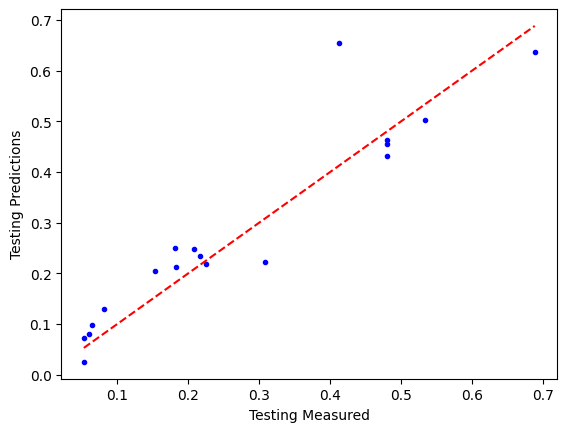

In [55]:
# Assuming y_test and y_pred are arrays of measured and predicted values, respectively
print(predicted.shape, y_scaled_test.shape)
y_pred = reg1.predict(X_scaled_test)
plt.plot(y_scaled_test,predicted, 'b.')
plt.plot(np.linspace(np.min(y_scaled_test), np.max(y_scaled_test)), np.linspace(np.min(y_scaled_test), np.max(y_scaled_test)), 'r--')
plt.xlabel('Testing Measured')
plt.ylabel('Testing Predictions')
# plt.title('Measured Vs. Predicted, Testing Data Set (30% of the data)')


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
#Scaling the data 

# create a StandardScaler object
scaler = MinMaxScaler()

# fit the scaler to the dataset
scaler.fit(X_train)

# transform the dataset using the fitted scaler
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

scaler_Y = MinMaxScaler()

# fit the scaler to the dataset
scaler_Y.fit(y_train)
# transform the dataset using the fitted scaler
y_scaled_train = scaler_Y.transform(y_train)
y_scaled_test = scaler_Y.transform(y_test)

#### Performing Feature Selection 

In [58]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor

## Sequential Forward Floating Selection(sffs)
sffs = SFS(GradientBoostingRegressor(n_estimators=200, learning_rate = 0.25),
         k_features=(4),    
         forward=True,
         floating=True,
         cv=0)

sffs.fit(X_scaled_train, y_scaled_train)
sffs.k_feature_names_

('0', '1', '2', '3')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X[['T','Rsb','Gas gravity','Density']], y, test_size=0.3, random_state=42)

In [60]:
#Scaling the data 

# create a StandardScaler object
scaler = MinMaxScaler()

# fit the scaler to the dataset
scaler.fit(X_train)

# transform the dataset using the fitted scaler
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

scaler_Y = MinMaxScaler()

# fit the scaler to the dataset
scaler_Y.fit(y_train)
# transform the dataset using the fitted scaler
y_scaled_train = scaler_Y.transform(y_train)
y_scaled_test = scaler_Y.transform(y_test)

In [61]:
print('Ensemble Model after Feature Selection - results', '\n')
pred = [[]]
for reg, name in zip([reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9,reg10,VC],
                     ['SVR','ANN','SVR-2','DT2',
                      'Gradient','Gradient-2','Gradient-3','RF-3','DT-3','Gradient-4','Voting Regressor']):
    reg.fit(X_scaled_train, y_scaled_train)
    predicted = reg.predict(X_scaled_test)
    pred.append(predicted)
    y_scaled_test = np.squeeze(y_scaled_test)
    mse = mean_squared_error(y_scaled_test, predicted)
    r2 = r2_score(y_scaled_test, predicted)
    r, p_value = pearsonr(y_scaled_test,predicted)
    n = len(y_scaled_test)
    aape = (100/n) * sum(abs(y_scaled_test[i] - predicted[i]) / y_scaled_test[i] for i in range(n))
    print(name, 'R2-score on test:', np.round(r2_score(y_scaled_test, predicted),4))
    print(name, 'Test error:', np.round(mean_squared_error(y_scaled_test, predicted),4), '\n')
    print("R value: ",r)
    print("AAPE:",aape)
    print("------------------------------------------------------------------------------")

Ensemble Model after Feature Selection - results 

SVR R2-score on test: 0.8583
SVR Test error: 0.0051 

R value:  0.9288128878428029
AAPE: 26.657204304566637
------------------------------------------------------------------------------
ANN R2-score on test: 0.919
ANN Test error: 0.0029 

R value:  0.960203789600776
AAPE: 36.08611890746184
------------------------------------------------------------------------------
SVR-2 R2-score on test: 0.896
SVR-2 Test error: 0.0038 

R value:  0.9517882061164425
AAPE: 25.12200455483595
------------------------------------------------------------------------------
DT2 R2-score on test: 0.7203
DT2 Test error: 0.0101 

R value:  0.892077831248264
AAPE: 28.785422864808808
------------------------------------------------------------------------------
Gradient R2-score on test: 0.776
Gradient Test error: 0.0081 

R value:  0.8998103184811457
AAPE: 28.59388699610649
------------------------------------------------------------------------------
Gradient